# サンプルデータセット

X.shape: (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


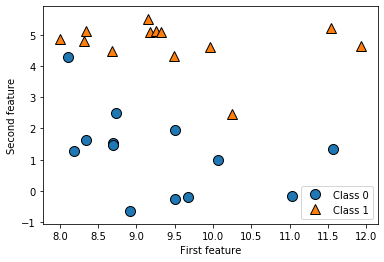

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install mglearn
import mglearn
from IPython.display import display

#データセットの生成
X,y = mglearn.datasets.make_forge()
#データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))


Text(0, 0.5, 'Target')

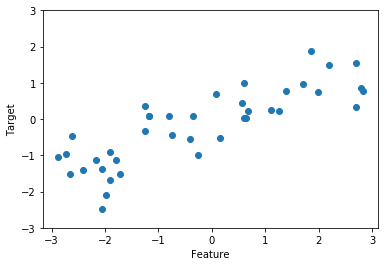

In [25]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, "o")
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [35]:
print(cancer["target"].shape)

(569,)


In [37]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [39]:
print("Sample counts per class: \n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [44]:
print("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [46]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Date shape: {}".format(boston.data.shape))

Date shape: (506, 13)


In [49]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [53]:
print(boston["DESCR"][:190])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categoric


In [56]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


# k-最近傍法

* k-最近傍法によるクラス分類

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


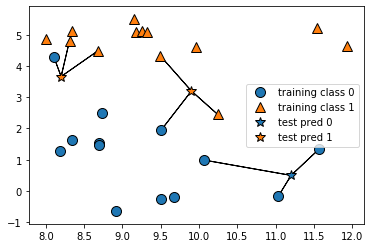

In [66]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [68]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(
        X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [74]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [78]:
print("Test set prediction :{}".format(clf.predict(X_test)))

Test set prediction :[1 0 1 0 1 0 0]


In [80]:
print("Test of accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test of accuracy: 0.86


* KNeighborsClassifierの解析

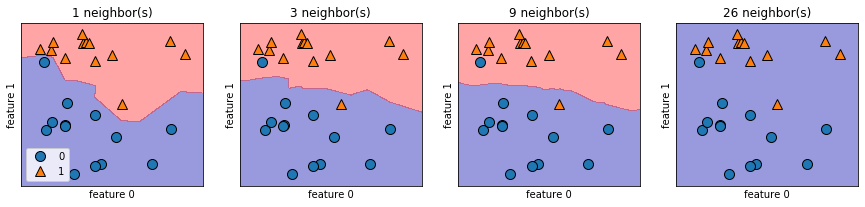

In [112]:
fig, axes = plt.subplots(1, 4, figsize=(15,3))

for n, ax in zip([1, 3, 9, 26], axes):
    #fitメソッドは自分自身を返すから、1行
    #インスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors= n).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0],X[:, 1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [117]:
# Xデータ数
print(X.shape)

(26, 2)


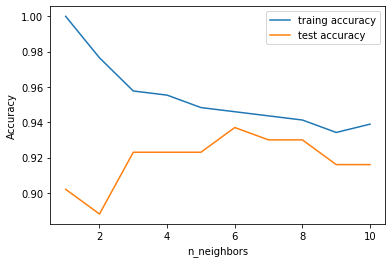

In [121]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    #stratify=cancer.target : cancer.targetのクラスによる層化サンプリングを行う
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを0～10まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #訓練セット精度を記録
    training_accuracy.append(clf.score(X_train,y_train))
    #汎化精度を記録
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="traing accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

* k-近傍回帰

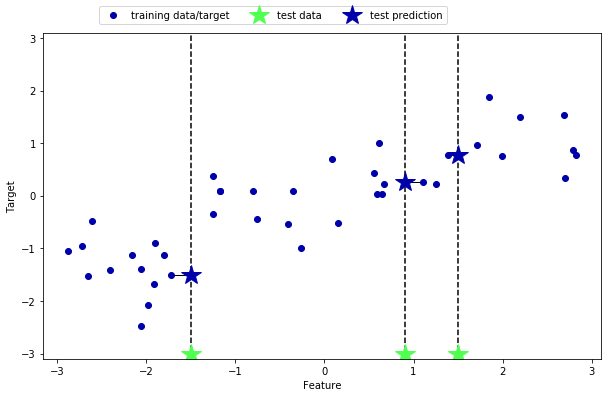

In [122]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

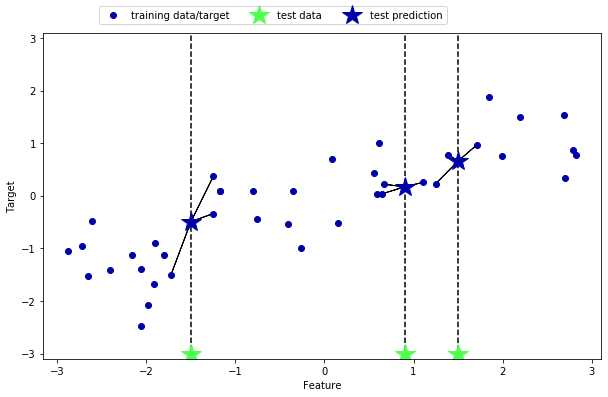

In [123]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [128]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

#waveデータセットを訓練セットとテストセットに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
#訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [130]:
print("Test set predictions: {}".format(reg.predict(X_test)))

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [132]:
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


* KNeighoborsRegressorの回帰

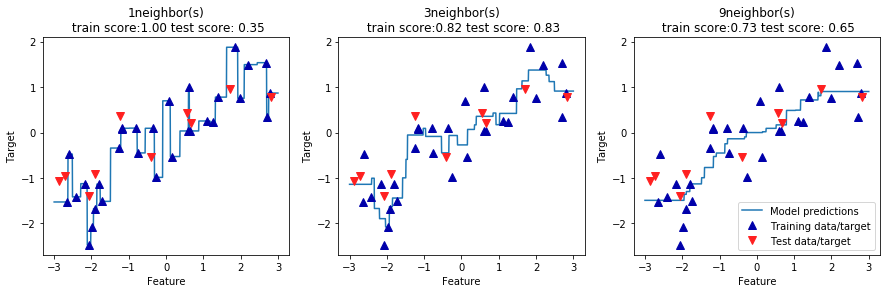

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
#-3から3までの間に、1000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #1, 3, 9近傍法で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train,"^",c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,"v",c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
        "{}neighbor(s)\n train score:{:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[2].legend(["Model predictions", "Training data/target","Test data/target"],loc="best")

# 線形モデル

* 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


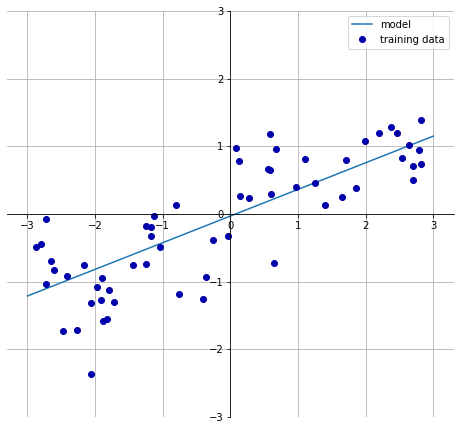

In [141]:
mglearn.plots.plot_linear_regression_wave()

* 線形回帰（通常最小二乗法）

In [143]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [145]:
#coef_属性は傾きの係数（重み）、intercept_属性は切片（オフセット）
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_:-0.031804343026759746


In [147]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


In [148]:
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [150]:
print("Training set score : {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score : {:.2f}".format(lr.score(X_test,y_test)))

Training set score : 0.95
Test set score : 0.61


In [156]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


* リッジ回帰

In [159]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [160]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


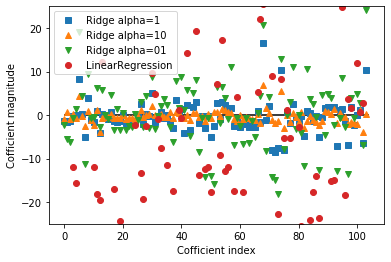

In [161]:
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=01")

plt.plot(lr.coef_, "o",label="LinearRegression")
plt.xlabel("Cofficient index")
plt.ylabel("Cofficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

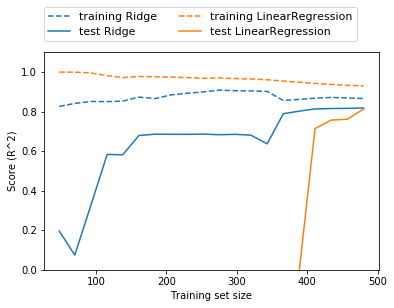

In [162]:
mglearn.plots.plot_ridge_n_samples()

* Lasso

In [164]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of feature used: {:.2f}".format(np.sum(lasso.coef_)))

Training set score: 0.29
Test set score: 0.21
Number of feature used: -10.13


In [165]:
print(lasso.coef_)

[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0.         -0. 

In [166]:
#coef_はtrue,falseで返す
print(lasso.coef_!=0)

[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False]


In [167]:
print(sum(lasso.coef_==0))

100


In [168]:
print(sum(lasso.coef_!=0))

4


In [172]:
#"max_iter"の値を増やす
#こうしておかないとモデルが、"max_iter"を増やすように警告を発する
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_!=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [171]:
#過剰適合ver
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of feature used: {}".format(np.sum(lasso00001.coef_!=0)))

Training set score: 0.95
Test set score: 0.64
Number of feature used: 96


Text(0, 0.5, 'Cofficient magnitude')

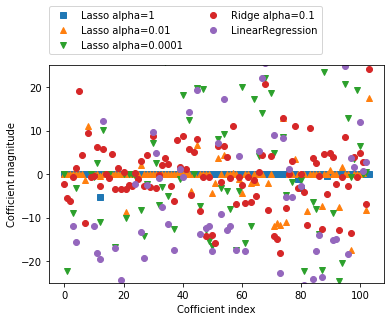

In [174]:
#plot
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.plot(lr.coef_, "o", label="LinearRegression")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Cofficient index")
plt.ylabel("Cofficient magnitude")

* クラス分類のための線形モデル

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


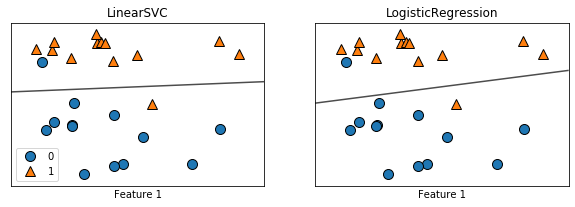

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))  #_が2つ繋がってる
    ax.set_xlabel("Feature 0")
    ax.set_xlabel("Feature 1")
axes[0].legend()

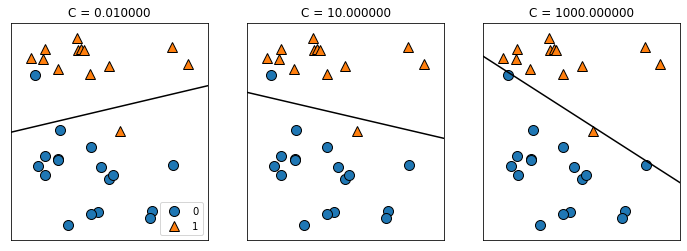

In [189]:
#Cの大きさによる決定境界の決まり方
mglearn.plots.plot_linear_svc_regularization()

In [210]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score : {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score : {:.3f}".format(logreg.score(X_test, y_test)))

Training set score : 0.955
Test set score : 0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [211]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.972
Test set score: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [212]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score: 0.934
Test set score: 0.930


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


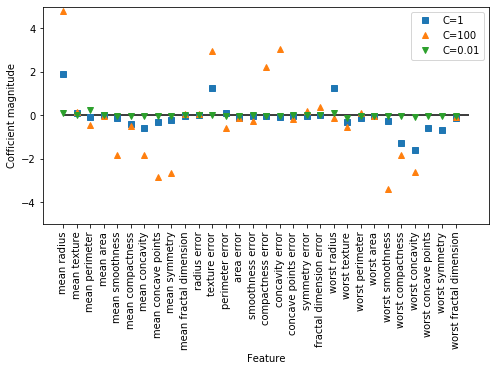

In [240]:
#plot
fig=plt.figure(figsize=(8.0,4.0))
plt.plot(logreg.coef_.T, "s", label="C=1")
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg001.coef_.T, "v", label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Cofficient magnitude") #係数の大きさ
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.913146
Test accuracy of l1 logreg with C=0.001: 0.923077


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=1.000: 0.960094
Test accuracy of l1 logreg with C=1.000: 0.958042


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=100.000: 0.985915
Test accuracy of l1 logreg with C=100.000: 0.979021


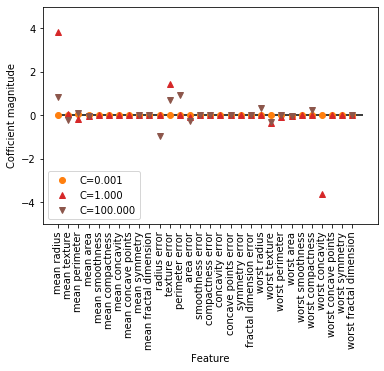

In [233]:
#L1正則化の分類制度
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:2f}".format(
        C, lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:2f}".format(
        C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.score(X_test,y_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Cofficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

* 線形モデルによる他クラス分類

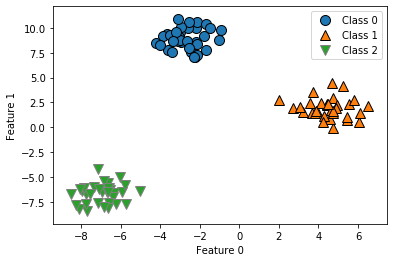

In [248]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [250]:
linear_svm = LinearSVC().fit(X,y)
print("Cofficient shape: ",linear_svm.coef_.shape)
print("Intercept shape",linear_svm.intercept_.shape)

Cofficient shape:  (3, 2)
Intercept shape (3,)


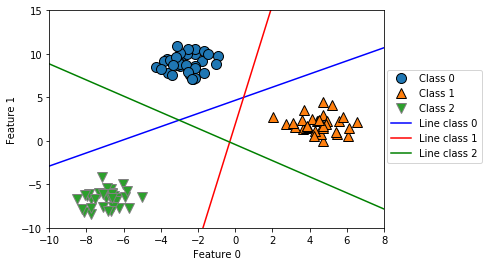

In [255]:
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2","Line class 0","Line class 1","Line class 2"], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

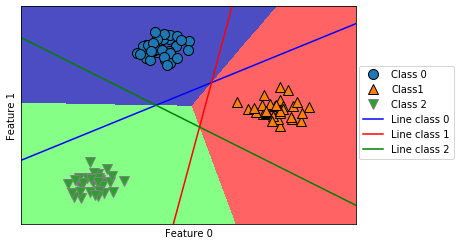

In [260]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b","r","g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")